# *匯入close, open,high,low,vol

In [53]:
import pandas as pd
close = pd.read_csv('close.csv',index_col='date')
Open = pd.read_csv('Open.csv',index_col='date')
high = pd.read_csv('high.csv',index_col='date')
low = pd.read_csv('low.csv',index_col='date')
vol = pd.read_csv('vol.csv',index_col='date')


# *check

In [54]:
close.head()
# close.dtypes

,1101,1102,1103,1104,1108,1109,1110,1201,1203,1210,...,9944,9945,9946,9949,9950,9951,9955,9958,9960,9962
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,34.30,34.55,18.40,18.40,9.03,10.65,11.60,42.95,25.60,35.05,...,26.45,43.15,13.25,32.60,18.05,33.15,63.6,12.80,28.80,16.2
2010-01-05,35.50,35.30,18.30,18.10,8.96,10.70,11.70,43.00,25.55,35.10,...,25.90,43.20,13.20,32.50,18.20,32.30,62.8,12.25,29.00,16.0
2010-01-06,36.25,35.55,18.00,18.25,8.95,10.80,11.85,43.00,25.70,35.70,...,26.00,43.70,13.05,32.35,18.65,32.15,63.7,12.55,31.00,16.0
2010-01-07,35.55,35.15,17.70,17.80,9.10,10.85,11.80,42.90,25.40,35.10,...,26.40,42.95,13.05,31.70,18.80,31.90,62.6,12.40,30.80,16.0
2010-01-08,35.40,35.35,17.95,17.90,9.20,10.85,11.90,42.50,25.50,35.40,...,26.75,42.90,13.00,30.80,18.15,32.10,62.5,12.60,31.05,15.9


# *測試用talib一些特徵值組成dataset

In [55]:
import talib
from talib import abstract


# dir(talib) # 查看talib function
rsi=talib.RSI(close['1101'], timeperiod=28)
# rsi
k, d= talib.STOCH(high['1101'], low['1101'], close['1101'])
# k
# rsi.plot()
# k.plot()
# d.plot()

dataset = pd.DataFrame({
    'rsi':rsi,
    'k':k,
    'd':d
    
})
feature_names = dataset.columns
# feature_names
#加y :return
dataset['return']=close['1101'].shift(-10)/close['1101']  #加入預測未來10個收盤價
dataset

,rsi,k,d,return
date,,,,
2010-01-04,NaN,NaN,NaN,0.997085
2010-01-05,NaN,NaN,NaN,0.967606
2010-01-06,NaN,NaN,NaN,0.937931
2010-01-07,NaN,NaN,NaN,0.953586
2010-01-08,NaN,NaN,NaN,0.898305
...,...,...,...,...
2021-04-19,77.659993,88.618983,73.139401,NaN
2021-04-20,80.639443,87.498713,82.357621,NaN
2021-04-21,85.331102,83.458309,86.525335,NaN


# 把指標畫出來

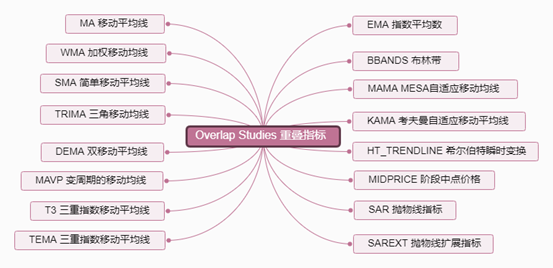

<AxesSubplot:xlabel='date'>

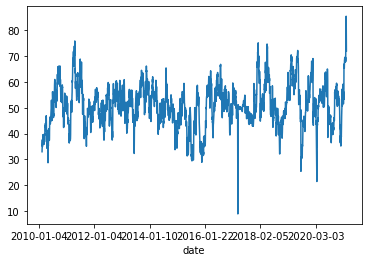

In [56]:
%matplotlib inline
import matplotlib # 注意这个也要import一次
import matplotlib.pyplot as plt
rsi.plot()
# k.plot()
# d.plot()

# *計算出單支股票所有指標

In [57]:
import talib
stockid='1101'

df = pd.DataFrame({
    'close':close[stockid],
    'open':Open[stockid],
    'high':high[stockid],
    'low':low[stockid],
    'volume':vol[stockid]/1000
    
})
# 確認價量資料表 df 的值都是 float 格式
# df = df.astype('int')
df = df.astype('float')
# for fname in dir(talib):
#     if fname [:3] == 'CDL':
#         print(fname)
        

# 準備一份你想要計算並且併入 df 的技術指標清單
# ta_list = ['dir(talib)']

# # 這裡示範全部 158 種技術指標
ta_list = talib.get_functions()

# 迴圈執行，看看結果吧！
for x in ta_list:
    try:
        # x 為技術指標的代碼，透過迴圈填入，再透過 eval 計算出 output
        output = eval('abstract.'+x+'(df)')
        # 如果輸出是一維資料，幫這個指標取名為 x 本身；多維資料則不需命名
        output.name = x.lower() if type(output) == pd.core.series.Series else None
        # 透過 merge 把輸出結果併入 df DataFrame
        df = pd.merge(df, pd.DataFrame(output), left_on = df.index, right_on = output.index)
#         df = df.set_index('date')
        df = df.set_index('key_0')
   
    except:
        print(x)
        
# df.dtypes
# df
# df['return']=close[stockid].shift(-10)/close[stockid]  #預測未來10個收盤價後漲跌
# df.tail()
# df.set_index(['date'])
df.head()
df.index.name = 'date'
df.head()

MAVP


,close,open,high,low,volume,ht_dcperiod,ht_dcphase,inphase,quadrature,sine,...,linearreg_slope,stddev,tsf,var,atr,natr,trange,ad,adosc,obv
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,34.30,34.00,34.4,33.90,8299.290,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4979.574000,NaN,8299.290
2010-01-05,35.50,34.60,35.8,34.50,48059.367,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.50,30857.694692,NaN,56358.657
2010-01-06,36.25,35.50,36.4,35.40,36026.739,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.00,56076.411992,NaN,92385.396
2010-01-07,35.55,36.35,36.4,35.50,14531.020,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.90,43159.949770,NaN,77854.376
2010-01-08,35.40,35.55,35.8,35.15,10671.139,NaN,NaN,NaN,NaN,NaN,...,NaN,0.626897,NaN,0.393,NaN,NaN,0.65,40697.379232,NaN,67183.237


# 查看data

In [58]:
df
df.isnull().sum()
# df.info()
# df.describe()

close      0
open       0
high       0
low        0
volume     0
          ..
natr      14
trange     1
ad         0
adosc      9
obv        0
Length: 179, dtype: int64

# 去除NA值

In [59]:
df
print(df.shape)
df= df.dropna(thresh=int(len(df)*0.8),axis=1)
df= df.dropna(how='any')
print(df.shape)

(2780, 179)
(2690, 177)


In [60]:
df.isnull().sum()
df['return']=close[stockid].shift(-10)/close[stockid]  ##加入預測未來10個收盤價後漲跌
print(df.shape)
df1=df.dropna(axis='rows', how='any')
df1
print(df1.shape)
# df1.isnull().sum()
# df1.info()
df1.describe()

(2690, 178)
(2680, 178)


,close,open,high,low,volume,ht_dcperiod,ht_dcphase,inphase,quadrature,sine,...,stddev,tsf,var,atr,natr,trange,ad,adosc,obv,return
count,2680.000000,2680.000000,2680.000000,2680.000000,2680.000000,2680.000000,2680.000000,2680.000000,2680.000000,2680.000000,...,2680.000000,2680.000000,2.680000e+03,2680.000000,2680.000000,2680.000000,2680.000000,2680.000000,2.680000e+03,2680.000000
mean,38.295765,38.306940,38.628377,37.939701,12045.180163,21.677486,130.950005,0.036506,0.007130,-0.019815,...,0.462781,38.286199,7.268064e-01,0.782576,2.078002,0.770131,402835.167304,835.076514,7.042952e+05,1.002830
std,5.008168,5.008863,5.027480,5.000111,8868.015215,5.299261,98.501086,1.386798,2.350116,0.606831,...,0.716123,5.118959,1.115017e+01,0.353646,1.001480,0.865449,256846.920525,10340.454552,3.861921e+05,0.054771
min,25.500000,25.500000,25.750000,25.450000,761.927000,11.820456,-44.626026,-30.836970,-26.374321,-0.999998,...,0.000003,18.908791,7.275958e-12,0.216220,0.641602,0.100000,-254608.346492,-45734.679402,-2.548409e+05,0.000000
25%,34.750000,34.737500,35.050000,34.400000,6239.434000,17.767032,35.064162,-0.427174,-0.725919,-0.515313,...,0.223383,34.614148,4.990000e-02,0.604391,1.531123,0.450000,258199.404398,-4462.341146,4.993307e+05,0.976789
50%,37.950000,38.000000,38.250000,37.575000,9465.944500,20.556948,155.016158,0.058741,-0.018540,-0.051797,...,0.352704,37.981319,1.244000e-01,0.725054,1.978083,0.650000,452258.169954,1078.989005,6.685286e+05,1.004627
75%,42.600000,42.550000,42.900000,42.250000,15233.572000,24.409381,204.367947,0.549357,0.713789,0.487267,...,0.558928,42.661126,3.124000e-01,0.864579,2.355836,0.900000,589996.999537,6940.275008,8.384129e+05,1.031090
max,49.550000,49.550000,49.800000,48.900000,102000.789000,39.214200,314.842415,20.387078,63.335914,1.000000,...,17.729027,49.393956,3.143184e+02,5.341786,15.005016,37.100000,842548.240868,33944.553437,1.681518e+06,1.254701


# 查看data

In [61]:
import numpy as np
# df2=pd.to_numeric(df1['return'])
# ?df2= df1.iloc[:,10:11].apply(np.int)
# df2=df1['return'].apply(np.int)
# df2=df1.loc[:,:].apply(np.int64)
# df1.dtypes
# df2.isnull().sum()
# df.info()
# df1.describe()
# df1['return'].astype('int')
df1['return']= df1['return'].astype('int')

C:\Users\Mikie\.conda\envs\finlab\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [62]:
df1.dtypes

close     float64
open      float64
high      float64
low       float64
volume    float64
           ...   
trange    float64
ad        float64
adosc     float64
obv       float64
return      int32
Length: 178, dtype: object

In [63]:
feature_names = list(df1.columns[6:-1])
feature_names

['ht_dcphase',
 'inphase',
 'quadrature',
 'sine',
 'leadsine',
 'ht_trendmode',
 'add',
 'div',
 'max_x',
 'maxindex',
 'min_x',
 'minindex',
 'min_y',
 'max_y',
 'minidx',
 'maxidx',
 'mult',
 'sub',
 'sum',
 'atan',
 'ceil',
 'cos',
 'cosh',
 'exp',
 'floor',
 'ln',
 'log10',
 'sin',
 'sinh',
 'sqrt',
 'tan',
 'tanh',
 'adx',
 'adxr',
 'apo',
 'aroondown',
 'aroonup',
 'aroonosc',
 'bop',
 'cci',
 'cmo',
 'dx',
 'macd_x',
 'macdsignal_x',
 'macdhist_x',
 'macd_y',
 'macdsignal_y',
 'macdhist_y',
 'macd',
 'macdsignal',
 'macdhist',
 'mfi',
 'minus_di',
 'minus_dm',
 'mom',
 'plus_di',
 'plus_dm',
 'ppo',
 'roc',
 'rocp',
 'rocr',
 'rocr100',
 'rsi',
 'slowk',
 'slowd',
 'fastk_x',
 'fastd_x',
 'fastk_y',
 'fastd_y',
 'trix',
 'ultosc',
 'willr',
 'upperband',
 'middleband',
 'lowerband',
 'dema',
 'ema',
 'ht_trendline',
 'kama',
 'ma',
 'mama',
 'fama',
 'midpoint',
 'midprice',
 'sar',
 'sarext',
 'sma',
 't3',
 'tema',
 'trima',
 'wma',
 'cdl2crows',
 'cdl3blackcrows',
 'cdl3insi

# Split Train Test dataset

In [64]:
dataset_train = df1[:'2015']
dataset_test = df1['2016':]
X_train = dataset_train[feature_names]
y_train = dataset_train['return']
X_test = dataset_test[feature_names]
y_test = dataset_test['return']
# X_train



In [65]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# preprocessing & Training 

In [66]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

model = RandomForestClassifier(n_estimators=10)
model.fit(X_train, y_train)

X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
num_correct_samples = accuracy_score(y_test, y_pred, normalize=False)
con_matrix = confusion_matrix(y_test, y_pred)


print('number of correct sample: {}'.format(num_correct_samples))
print('accuracy: {}'.format(accuracy))
print('con_matrix: {}'.format(con_matrix))


number of correct sample: 601
accuracy: 0.46879875195007803
con_matrix: [[434 100]
 [581 167]]


# use RandomizedSearchCV and estmator 
https://github.com/dask/dask-ml/issues/159

In [67]:
from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# from dask_searchcv import GridSearchCV
# from dask_searchcv import RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn", lineno=1978)

# build a classifier
clf = RandomForestClassifier(n_estimators=100)


# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                results['mean_test_score'][candidate],
                results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

start = time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

# use a full grid over all parameters
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid)
start = time()
grid_search.fit(X_train, y_train)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

RandomizedSearchCV took 13.95 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.547 (std: 0.036)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 9, 'min_samples_leaf': 10, 'min_samples_split': 9}

Model with rank: 2
Mean validation score: 0.542 (std: 0.028)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'max_features': 10, 'min_samples_leaf': 8, 'min_samples_split': 7}

Model with rank: 2
Mean validation score: 0.542 (std: 0.032)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 10}

GridSearchCV took 140.43 seconds for 216 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.555 (std: 0.013)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 10, 'min_samples_split': 3}

Model with rank: 2
Mean validation score: 0.549 (std: 0.0

In [68]:
#save best model
rf_best = random_search.best_estimator_
rf_best

# rf_best = rf_gs.best_estimator_

# #check best n_estimators value
# print(rf_gs.best_params_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=9, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [69]:
import xgboost as xgb
import time
from sklearn.model_selection import RandomizedSearchCV
#x_train, y_train, x_valid, y_valid, x_test, y_test =  # load datasets
clf = xgb.XGBClassifier()
param_grid = {
        'silent': [False],
        'max_depth': [6, 10, 15, 20],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'n_estimators': [100]}
fit_params = {#'eval_metric': 'mlogloss',
              'early_stopping_rounds': 10,
              'eval_set': [X_test],
              'verbose': 0}
rs = RandomizedSearchCV(clf, param_grid, n_iter=20,
                            n_jobs=1, verbose=2, cv=2,
                            scoring='neg_log_loss', refit=True, random_state=42)
rs.fit(X_train, y_train)


Fitting 2 folds for each of 20 candidates, totalling 40 fits
[CV] subsample=0.7, silent=False, reg_lambda=50.0, n_estimators=100, min_child_weight=5.0, max_depth=6, learning_rate=0.2, gamma=1.0, colsample_bytree=0.9, colsample_bylevel=0.4 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.7, silent=False, reg_lambda=50.0, n_estimators=100, min_child_weight=5.0, max_depth=6, learning_rate=0.2, gamma=1.0, colsample_bytree=0.9, colsample_bylevel=0.4, total=   0.3s
[CV] subsample=0.7, silent=False, reg_lambda=50.0, n_estimators=100, min_child_weight=5.0, max_depth=6, learning_rate=0.2, gamma=1.0, colsample_bytree=0.9, colsample_bylevel=0.4 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  subsample=0.7, silent=False, reg_lambda=50.0, n_estimators=100, min_child_weight=5.0, max_depth=6, learning_rate=0.2, gamma=1.0, colsample_bytree=0.9, colsample_bylevel=0.4, total=   0.3s
[CV] subsample=0.6, silent=False, reg_lambda=1.0, n_estimators=100, min_child_weight=1.0, max_depth=20, learning_rate=0.1, gamma=0.25, colsample_bytree=0.8, colsample_bylevel=0.8 
[CV]  subsample=0.6, silent=False, reg_lambda=1.0, n_estimators=100, min_child_weight=1.0, max_depth=20, learning_rate=0.1, gamma=0.25, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.6s
[CV] subsample=0.6, silent=False, reg_lambda=1.0, n_estimators=100, min_child_weight=1.0, max_depth=20, learning_rate=0.1, gamma=0.25, colsample_bytree=0.8, colsample_bylevel=0.8 
[CV]  subsample=0.6, silent=False, reg_lambda=1.0, n_estimators=100, min_child_weight=1.0, max_depth=20, learning_rate=0.1, gamma=0.25, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.6s
[CV] subsample=0.9, silent=False, reg_lambda=50.0, n_est

C:\Users\Mikie\.conda\envs\finlab\lib\site-packages\sklearn\metrics\classification.py:2174: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\Mikie\.conda\envs\finlab\lib\site-packages\sklearn\metrics\classification.py:2174: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\Mikie\.conda\envs\finlab\lib\site-packages\sklearn\metrics\classification.py:2174: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\Mikie\.conda\envs\finlab\lib\site-packages\sklearn\metrics\classification.py:2174: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)


[CV]  subsample=0.7, silent=False, reg_lambda=5.0, n_estimators=100, min_child_weight=10.0, max_depth=20, learning_rate=3, gamma=0.25, colsample_bytree=0.9, colsample_bylevel=0.5, total=   0.1s
[CV] subsample=0.6, silent=False, reg_lambda=10.0, n_estimators=100, min_child_weight=1.0, max_depth=15, learning_rate=0.01, gamma=0, colsample_bytree=0.7, colsample_bylevel=0.8 
[CV]  subsample=0.6, silent=False, reg_lambda=10.0, n_estimators=100, min_child_weight=1.0, max_depth=15, learning_rate=0.01, gamma=0, colsample_bytree=0.7, colsample_bylevel=0.8, total=   0.8s
[CV] subsample=0.6, silent=False, reg_lambda=10.0, n_estimators=100, min_child_weight=1.0, max_depth=15, learning_rate=0.01, gamma=0, colsample_bytree=0.7, colsample_bylevel=0.8 
[CV]  subsample=0.6, silent=False, reg_lambda=10.0, n_estimators=100, min_child_weight=1.0, max_depth=15, learning_rate=0.01, gamma=0, colsample_bytree=0.7, colsample_bylevel=0.8, total=   0.6s
[CV] subsample=0.5, silent=False, reg_lambda=0.1, n_estimato

[CV]  subsample=0.5, silent=False, reg_lambda=5.0, n_estimators=100, min_child_weight=7.0, max_depth=10, learning_rate=0.001, gamma=0, colsample_bytree=0.6, colsample_bylevel=1.0, total=   0.3s
[CV] subsample=0.8, silent=False, reg_lambda=50.0, n_estimators=100, min_child_weight=0.5, max_depth=20, learning_rate=0, gamma=0.25, colsample_bytree=0.5, colsample_bylevel=0.5 
[CV]  subsample=0.8, silent=False, reg_lambda=50.0, n_estimators=100, min_child_weight=0.5, max_depth=20, learning_rate=0, gamma=0.25, colsample_bytree=0.5, colsample_bylevel=0.5, total=   0.5s
[CV] subsample=0.8, silent=False, reg_lambda=50.0, n_estimators=100, min_child_weight=0.5, max_depth=20, learning_rate=0, gamma=0.25, colsample_bytree=0.5, colsample_bylevel=0.5 
[CV]  subsample=0.8, silent=False, reg_lambda=50.0, n_estimators=100, min_child_weight=0.5, max_depth=20, learning_rate=0, gamma=0.25, colsample_bytree=0.5, colsample_bylevel=0.5, total=   0.5s
[CV] subsample=0.6, silent=False, reg_lambda=100.0, n_estima

C:\Users\Mikie\.conda\envs\finlab\lib\site-packages\sklearn\metrics\classification.py:2174: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\Mikie\.conda\envs\finlab\lib\site-packages\sklearn\metrics\classification.py:2174: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\Mikie\.conda\envs\finlab\lib\site-packages\sklearn\metrics\classification.py:2174: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\Mikie\.conda\envs\finlab\lib\site-packages\sklearn\metrics\classification.py:2174: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   14.7s finished
C:\Users\Mikie\.conda\envs\finlab\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: Th

[CV]  subsample=0.7, silent=False, reg_lambda=5.0, n_estimators=100, min_child_weight=1.0, max_depth=15, learning_rate=3, gamma=1.0, colsample_bytree=0.5, colsample_bylevel=0.4, total=   0.2s
[CV] subsample=0.7, silent=False, reg_lambda=5.0, n_estimators=100, min_child_weight=1.0, max_depth=15, learning_rate=3, gamma=1.0, colsample_bytree=0.5, colsample_bylevel=0.4 
[CV]  subsample=0.7, silent=False, reg_lambda=5.0, n_estimators=100, min_child_weight=1.0, max_depth=15, learning_rate=3, gamma=1.0, colsample_bytree=0.5, colsample_bylevel=0.4, total=   0.2s


RandomizedSearchCV(cv=2, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0...
                                        'gamma': [0, 0.25, 0.5, 1.0],
                                        'learning_rate': [0.001, 0.01, 0.1, 0.2,
                                                          0, 3],
      

In [70]:
xgb_best = rs.best_estimator_
xgb_best

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1.0,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0,
              learning_rate=0.001, max_delta_step=0, max_depth=10,
              min_child_weight=7.0, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=5.0, scale_pos_weight=1, seed=None,
              silent=False, subsample=0.5, verbosity=1)

In [71]:
from sklearn.neighbors import KNeighborsClassifier
#create new a knn model
knn = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
params_knn = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gs = GridSearchCV(knn, params_knn, cv=5)
#fit model to training data
knn_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [72]:
#save best model
knn_best = knn_gs.best_estimator_

#check best n_neigbors value
print(knn_gs.best_params_)

{'n_neighbors': 13}


In [73]:
#test the three models with the test data and print their accuracy scores

print('knn: {}'.format(knn_best.score(X_test, y_test)))
print('rf: {}'.format(rf_best.score(X_test, y_test)))
print('xgb: {}'.format(xgb_best.score(X_test, y_test)))

knn: 0.5374414976599063
rf: 0.5179407176287052
xgb: 0.5787831513260531


In [74]:
#create a dictionary of our models
estimators=[('rf', rf_best), ('xgb', xgb_best),('knn', knn_best)]

#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')

#fit model to training data
ensemble.fit(X_train, y_train)

#test our model on the test data
ensemble.score(X_test, y_test)

0.5561622464898596